# **I. Partie 1 : Notebook d’exploration visuelle complète**

In [126]:

#pour lire les fichiers excel
!pip install openpyxl

## Importation librairies 

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lecture data

In [128]:

# Paramètres graphiques globaux
sns.set(style="whitegrid")           # style Seaborn avec grille légère
plt.rcParams['figure.figsize'] = (12,6)  # taille par défaut des graphiques

# Chargement du fichier Excel
file_path = "../data/online_retail_II.xlsx"
df = pd.read_excel(file_path, sheet_name='Year 2010-2011')  # adapter le nom de la feuille

# Aperçu des 5 premières lignes
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [129]:
df.shape


(541910, 8)

In [130]:
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [131]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [132]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [133]:
df['Revenue'] = df['Quantity'].abs() * df['Price']


## 1. Fiche synthétique des données

In [134]:

# Création de la fiche synthétique sous forme de tableau
fiche_synthetique = pd.DataFrame({
    "Élément": [
        "Source",
        "Période - Date min",
        "Période - Date max",
        "Nombre de lignes",
        "Nombre de colonnes",
        "Clients uniques",
        "Pays uniques",
        "Chiffre d'affaires total (£)",
        "Factures uniques"
    ],
    "Valeur": [
        "https://archive.ics.uci.edu/dataset/502/online+retail+ii",
        df['InvoiceDate'].min(),
        df['InvoiceDate'].max(),
        df.shape[0],
        df.shape[1],
        df['Customer ID'].nunique(),
        df['Country'].nunique(),
        round(df['Revenue'].sum(),2),
        df['Invoice'].nunique()
    ]
})

# Affichage
display(fiche_synthetique)


,Élément,Valeur
0,Source,https://archive.ics.uci.edu/dataset/502/online...
1,Période - Date min,2010-12-01 08:26:00
2,Période - Date max,2011-12-09 12:50:00
3,Nombre de lignes,541910
4,Nombre de colonnes,9
5,Clients uniques,4372
6,Pays uniques,38
7,Chiffre d'affaires total (£),11541390.91
8,Factures uniques,25900


In [135]:

#nombre de valeurs uniques de customer ID 
count_id = df["Customer ID"].nunique()
print(count_id)

4372


## 2. Dictionnaire des variables

In [136]:

data_dictionary = pd.DataFrame({
    'Nom': [
        'Invoice', 
        'StockCode', 
        'Description', 
        'Quantity', 
        'InvoiceDate', 
        'Price', 
        'Customer ID', 
        'Country',
        'Revenue'
    ],
    
    'Type': [
        'string',
        'string',
        'string',
        'int',
        'datetime',
        'float',
        'float',
        'string',
        'float'
    ],
    
    'Sémantique': [
        'Numéro unique de la facture (C = annulation)',
        'Code unique du produit',
        'Nom du produit',
        'Quantité achetée (négatif = retour)',
        'Date et heure de la transaction',
        'Prix unitaire du produit',
        'Identifiant unique du client',
        'Pays du client',
        'Chiffre d’affaires de la ligne'
    ],

    'Unités/valeurs': [
        'Chaîne de caractères',
        'Chaîne de caractères',
        'Texte',
        'Entier',
        'Datetime',
        '£ (livres sterling)',
        'Nombre entier / NaN possible',
        'Texte',
        '£ (Quantity × Price)'
    ]
})

styled_dict = (
    data_dictionary.style
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#000000'),
                   ('color', 'white'),
                   ('font-size', '14px'),
                   ('text-align', 'center'),
                   ('border', '1px solid #444')]},
        {'selector': 'td',
         'props': [('border', '1px solid #666'),
                   ('color', '#111'),
                   ('padding', '6px'),
                   ('text-align', 'center')]},
        {'selector': 'tr:nth-child(odd)',
         'props': [('background-color', '#FFFFFF')]},
        {'selector': 'tr:nth-child(even)',
         'props': [('background-color', '#F2F2F2')]}
    ])
    .hide(axis='index')
  .set_table_attributes('style="margin-left:auto; margin-right:auto"')  # <-- centre le tableau
)

styled_dict


Nom,Type,Sémantique,Unités/valeurs
Invoice,string,Numéro unique de la facture (C = annulation),Chaîne de caractères
StockCode,string,Code unique du produit,Chaîne de caractères
Description,string,Nom du produit,Texte
Quantity,int,Quantité achetée (négatif = retour),Entier
InvoiceDate,datetime,Date et heure de la transaction,Datetime
Price,float,Prix unitaire du produit,£ (livres sterling)
Customer ID,float,Identifiant unique du client,Nombre entier / NaN possible
Country,string,Pays du client,Texte
Revenue,float,Chiffre d’affaires de la ligne,£ (Quantity × Price)


## 3. Qualité des données

### Valeurs manquantes

In [137]:
# Nombre et pourcentage de valeurs manquantes
missing_summary = pd.DataFrame({
    'Nombre de valeurs nulles': df.isnull().sum(),
    'Pourcentage (%)': df.isnull().mean()*100
}).sort_values(by='Pourcentage (%)', ascending=False)

missing_summary

,Nombre de valeurs nulles,Pourcentage (%)
Customer ID,135080,24.926648
Description,1454,0.268310
Invoice,0,0.000000
Quantity,0,0.000000
StockCode,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000
Revenue,0,0.000000


### Doublons

In [138]:

# Création d'un tableau des doublons
duplicates_table = pd.DataFrame({
    'Nombre de doublons': df.apply(lambda x: x.duplicated().sum())
})

# Trier par nombre de doublons décroissant pour plus de lisibilité
duplicates_table = duplicates_table.sort_values(by='Nombre de doublons', ascending=False)

# Affichage
duplicates_table


,Nombre de doublons
Country,541872
Quantity,541188
Price,540280
StockCode,537840
Description,537686
Customer ID,537537
Revenue,536661
InvoiceDate,518650
Invoice,516010


### Outliers

#### Outliers Quantité

In [139]:
# OUTLIERS QUANTITE
Q1 = df["Quantity"].quantile(0.25)  # 1er quartile
Q3 = df["Quantity"].quantile(0.75)  # 3e quartile
IQR = Q3 - Q1                        # Intervalle interquartile

# Bornes
lower_bound_q = Q1 - 1.5 * IQR
upper_bound_q = Q3 + 1.5 * IQR

# Filtrage des outliers
df["is_outlier_quantity"] = (df["Quantity"] < lower_bound_q) | (df["Quantity"] > upper_bound_q)

# Nombre d’outliers détectés
print("Nombre de quantity outliers :", df["is_outlier_quantity"].sum())


Nombre de quantity outliers : 58619


#### Outliers Prix

In [140]:
# OUTLIERS PRIX
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Bornes
lower_bound_p = Q1 - 1.5 * IQR
upper_bound_p = Q3 + 1.5 * IQR

# Filtrage des outliers
df["is_outlier_price"] = (df["Price"] < lower_bound_p) | (df["Price"] > upper_bound_p)

# Nombre d’outliers détectés
print("Nombre de prix outliers :", df["is_outlier_price"].sum())


Nombre de prix outliers : 39628


In [141]:
print(lower_bound_q)
print(upper_bound_q)
print(lower_bound_p)
print(upper_bound_p)

-12.5
23.5
-3.0700000000000003
8.45


In [142]:
#nombre de valeurs uniques du StockCode

count_sc = df["StockCode"].nunique()
print(count_sc)

4070


## Annulations de commandes

In [143]:
# Identifier les factures annulées
df['Annulation'] = df['Invoice'].astype(str).str.startswith('C')

# Créer la colonne Revenue
df['Revenue'] = df['Quantity'] * df['Price']

# Ajuster le revenu pour les annulations (Revenue négatif)
df.loc[df['Annulation'], 'Revenue'] *= -1

# Vérifications
print(f"Nombre de factures annulées : {df['Annulation'].sum()}")
print(f"CA total ajusté (inclut les annulations) : {df['Revenue'].sum():,.2f} £")

# Créer un dataset pour analyses clients (ventes uniquement, sans annulations)
df_clients = df[~df['Annulation']].copy()
print(f"Nombre de lignes pour analyses clients : {len(df_clients)}")

  

Nombre de factures annulées : 9288
CA total ajusté (inclut les annulations) : 11,541,390.91 £
Nombre de lignes pour analyses clients : 532622


In [144]:
# Retours sans annulation
df_clients['is_return'] = df_clients['Quantity'] < 0

# Produits endommagés (quantité négative, prix = 0)
df_clients['is_damage'] = (df_clients['Quantity'] < 0) & (df_clients['Price'] == 0)


## Granularité temporelle 

### Minute / Heure

In [145]:
# Extraire l'heure et la minute de la transaction
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute

# Nombre de transactions par heure
transactions_per_hour = df.groupby('Hour')['Invoice'].nunique()

# Affichage
print("Transactions par heure :")
print(transactions_per_hour)


Transactions par heure :
Hour
6       22
7       31
8      624
9     1824
10    2961
11    3165
12    3962
13    3369
14    3137
15    3069
16    1952
17    1205
18     333
19     219
20      28
Name: Invoice, dtype: int64


### Jour

In [146]:
df['Day'] = df['InvoiceDate'].dt.date  # extrait la date

# Nombre de transactions par jour
transactions_per_day = df.groupby('Day')['Invoice'].nunique()

transactions_per_day.head()


Day
2010-12-01    143
2010-12-02    167
2010-12-03    108
2010-12-05     95
2010-12-06    133
Name: Invoice, dtype: int64

### Semaine

In [147]:
df['Week'] = df['InvoiceDate'].dt.to_period('W')  # période hebdomadaire

# Nombre de transactions par semaine
transactions_per_week = df.groupby('Week')['Invoice'].nunique()

transactions_per_week.head()


Week
2010-11-29/2010-12-05    513
2010-12-06/2010-12-12    717
2010-12-13/2010-12-19    573
2010-12-20/2010-12-26    222
2011-01-03/2011-01-09    320
Freq: W-SUN, Name: Invoice, dtype: int64

### Mois


In [148]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # période mensuelle

# Nombre de transactions par mois
transactions_per_month = df.groupby('Month')['Invoice'].nunique()

transactions_per_month


Month
2010-12    2025
2011-01    1476
2011-02    1393
2011-03    1983
2011-04    1744
2011-05    2162
2011-06    2012
2011-07    1927
2011-08    1737
2011-09    2327
2011-10    2637
2011-11    3462
2011-12    1015
Freq: M, Name: Invoice, dtype: int64

### Année

In [149]:
df['Year'] = df['InvoiceDate'].dt.year

# Nombre de transactions par année
transactions_per_year = df.groupby('Year')['Invoice'].nunique()

transactions_per_year


Year
2010     2025
2011    23875
Name: Invoice, dtype: int64

#### Agrégation par jour , mois , année : nombre de transactions

In [150]:
# Agrégation par jour
df['Day'] = df['InvoiceDate'].dt.to_period('D')  # convertir en jour
daily_transactions = df.groupby('Day')['Invoice'].nunique().reset_index()
daily_transactions.rename(columns={'Invoice': 'Nombre de transactions'}, inplace=True)

# Agrégation par mois
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # convertir en mois
monthly_transactions = df.groupby('Month')['Invoice'].nunique().reset_index()
monthly_transactions.rename(columns={'Invoice': 'Nombre de transactions'}, inplace=True)

# Agrégation par année
df['Year'] = df['InvoiceDate'].dt.to_period('Y')  # convertir en année
yearly_transactions = df.groupby('Year')['Invoice'].nunique().reset_index()
yearly_transactions.rename(columns={'Invoice': 'Nombre de transactions'}, inplace=True)

# Affichage des tableaux
print("Transactions par jour :")
display(daily_transactions.head())
print("\nTransactions par mois :")
display(monthly_transactions.head())
print("\nTransactions par année :")
display(yearly_transactions.head())

Transactions par jour :


,Day,Nombre de transactions
0,2010-12-01,143
1,2010-12-02,167
2,2010-12-03,108
3,2010-12-05,95
4,2010-12-06,133



Transactions par mois :


,Month,Nombre de transactions
0,2010-12,2025
1,2011-01,1476
2,2011-02,1393
3,2011-03,1983
4,2011-04,1744



Transactions par année :


,Year,Nombre de transactions
0,2010,2025
1,2011,23875


In [151]:
# PRIX TOTAL PAR ACHAT"
df["Amount"] = df["Quantity"] * df["Price"]   

In [152]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month_Num'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Day'] = df['InvoiceDate'].dt.day


## Visualisation

### Distribution du montant des achats a l'échelle logarithmique

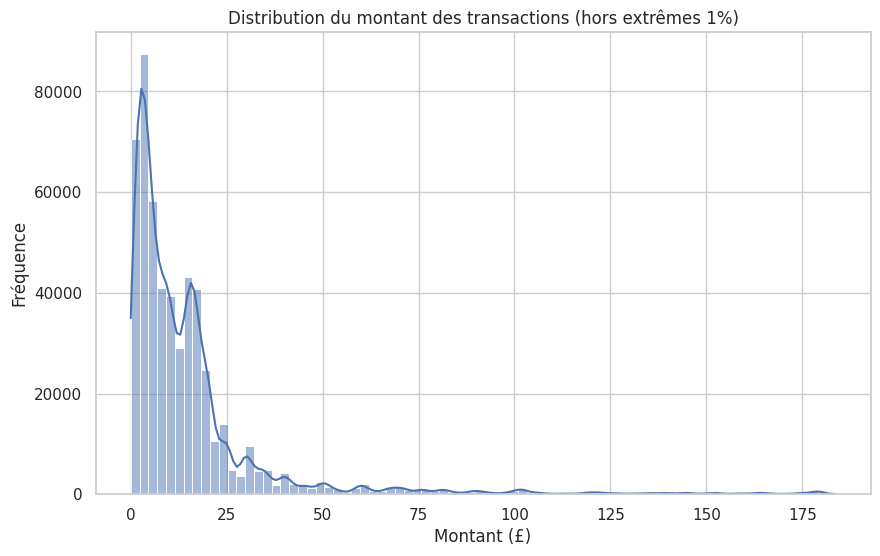

In [153]:
#DISTRIBUTION DU MONTANT DES ACHATS (sans les extrêmes 1%)
threshold = amount_pos.quantile(0.99)

plt.figure(figsize=(10,6))
sns.histplot(amount_pos[amount_pos <= threshold], bins=80, kde=True)
plt.title("Distribution du montant des transactions (hors extrêmes 1%)")
plt.xlabel("Montant (£)")
plt.ylabel("Fréquence")
plt.show()

Ce graphique montre la distribution du montant des transactions en utilisant les valeurs réelles, sans transformation logarithmique. Il permet d’observer la répartition des achats selon leur montant et de repérer les niveaux de prix les plus courants.
L’axe X représente le montant de la transaction (en £).
L’axe Y représente le nombre de transactions appartenant à chaque intervalle de montants (fréquence).

La distribution montre que la majorité des transactions concernent de petits montants, ce qui est typique d’un modèle commercial orienté B2C. En décidant de ne pas afficher les valeurs extrêmes (filtrage des 1% ou 5% les plus élevés), la forme de la distribution devient plus lisible et permet d’identifier clairement les montants les plus fréquents.
Les montants élevés sont beaucoup plus rares, mais ils peuvent représenter une part significative du chiffre d’affaires global, généralement associés à des commandes plus volumineuses, potentiellement B2B.

### Graphique du nombre de transactions par mois 

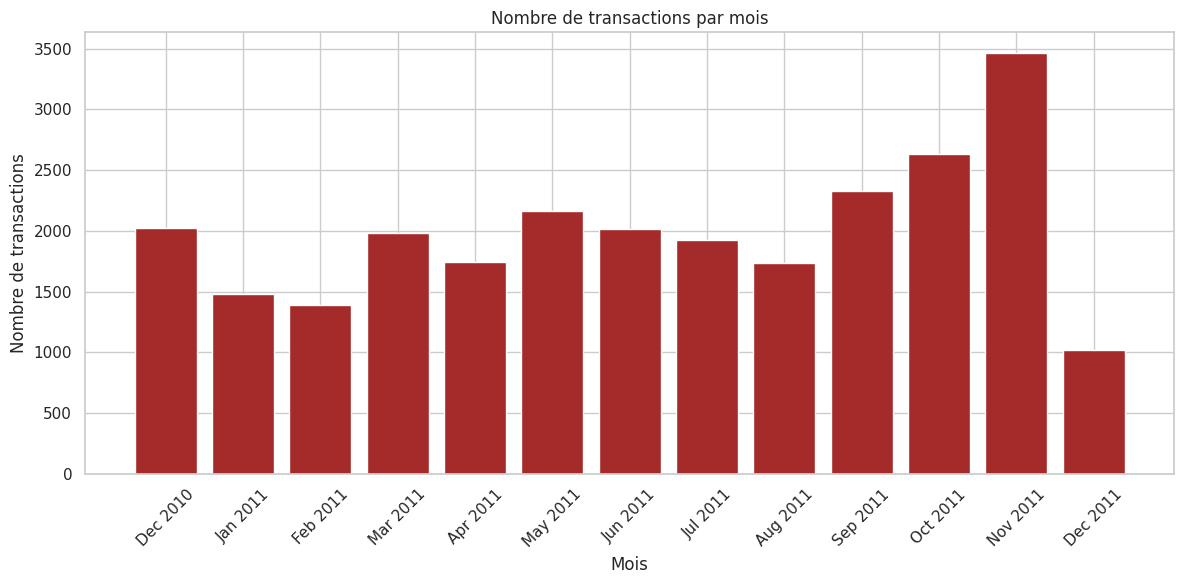

In [154]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Créer une colonne 'Month' pour l'agrégation
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # type Period

# Agréger par mois : nombre de transactions uniques
monthly_transactions = df.groupby('Month')['Invoice'].nunique()

# Convertir l'index Period en datetime pour plot
monthly_transactions.index = monthly_transactions.index.to_timestamp()

# Créer des labels lisibles : mois abrégé + année
month_labels = monthly_transactions.index.strftime('%b %Y')  # ex: Dec 2009, Jan 2010

# Plot
plt.figure(figsize=(12,6))
plt.bar(month_labels, monthly_transactions.values, color='brown')
plt.title("Nombre de transactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Pays par CA 

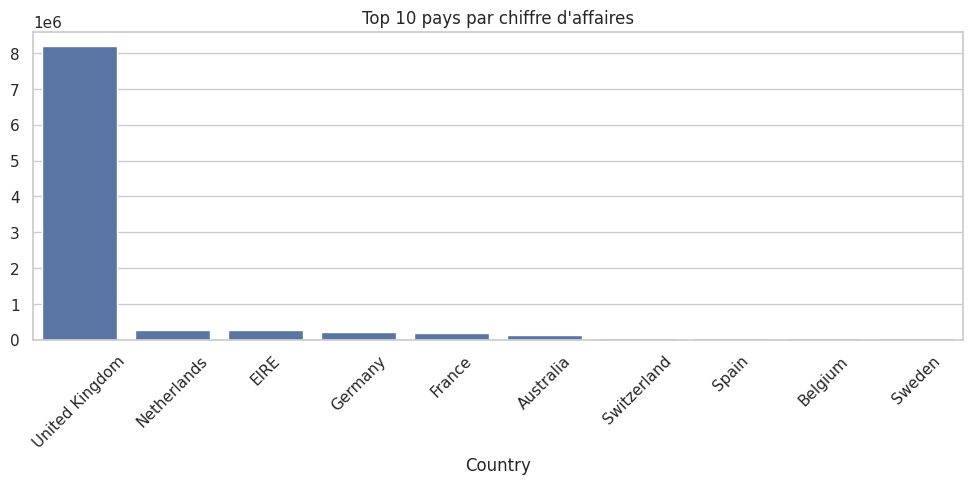

In [155]:
top_countries = df.groupby("Country")["Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,4))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 pays par chiffre d'affaires")
plt.xticks(rotation=45)
plt.show()

### Évolution du chiffre d'affaires mensuel

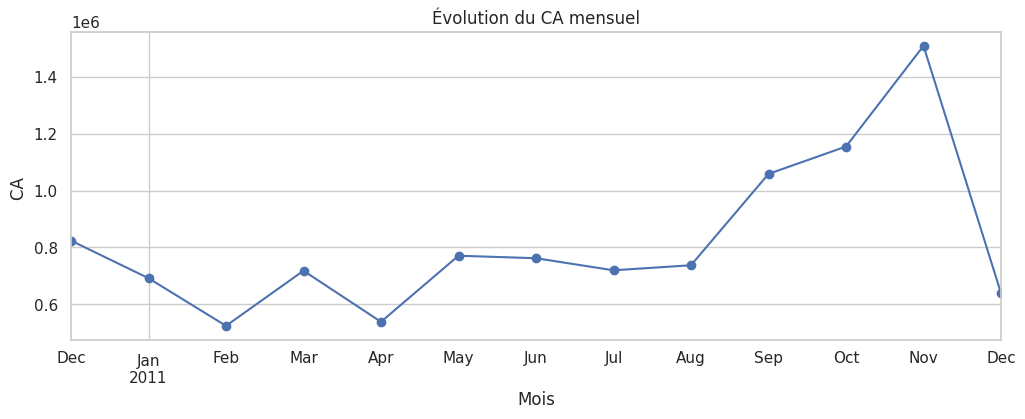

In [156]:
df_sales = df[df["Quantity"] > 0].copy()
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

plt.figure(figsize=(12,4))
df_sales.groupby("InvoiceMonth")["Amount"].sum().plot(marker="o")
plt.title("Évolution du CA mensuel")
plt.xlabel("Mois")
plt.ylabel("CA ") #devise = euro?
plt.grid(True)
plt.show()

### Chiffre d'affaires par jour de semaine

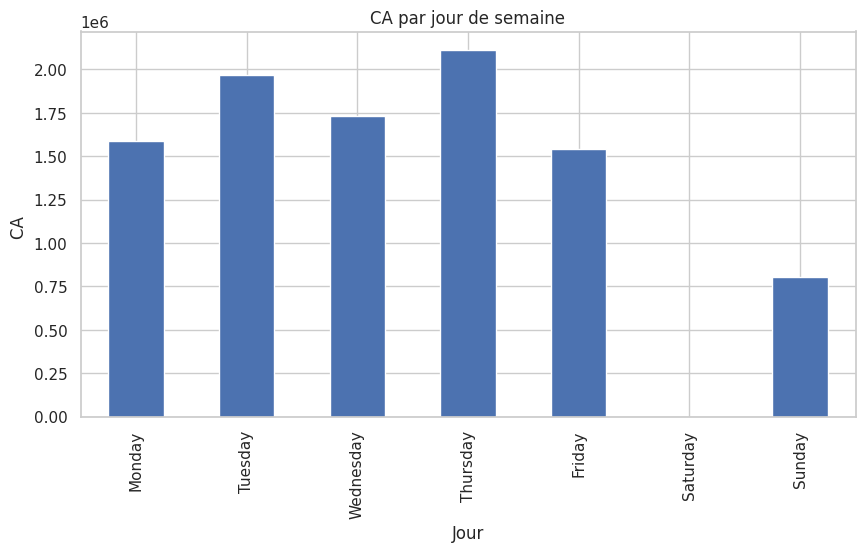

In [157]:

#SAISONNALITE JOURNALIERE (utile ou pas)

df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
order_dow = df.groupby("DayOfWeek")["Amount"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.figure(figsize=(10,5))
order_dow.plot(kind="bar")
plt.title("CA par jour de semaine")
plt.ylabel("CA ")
plt.xlabel("Jour")
plt.show()


### Mix Grossiste / Détaillant

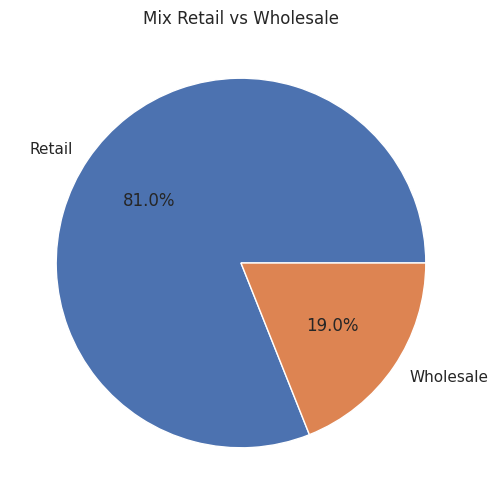

In [158]:
#MIX GROSSISTE/DETAILLANT

df["IsWholesale"] = df["Customer ID"].isna() | (df["Quantity"] > 1000)
mix = df.groupby("IsWholesale")["Amount"].sum()
mix.index = ["Retail","Wholesale"]
plt.figure(figsize=(6,6))
mix.plot(kind="pie", autopct="%1.1f%%")
plt.title("Mix Retail vs Wholesale")         
plt.ylabel("")
plt.show()

### Premier apercu des cohortes

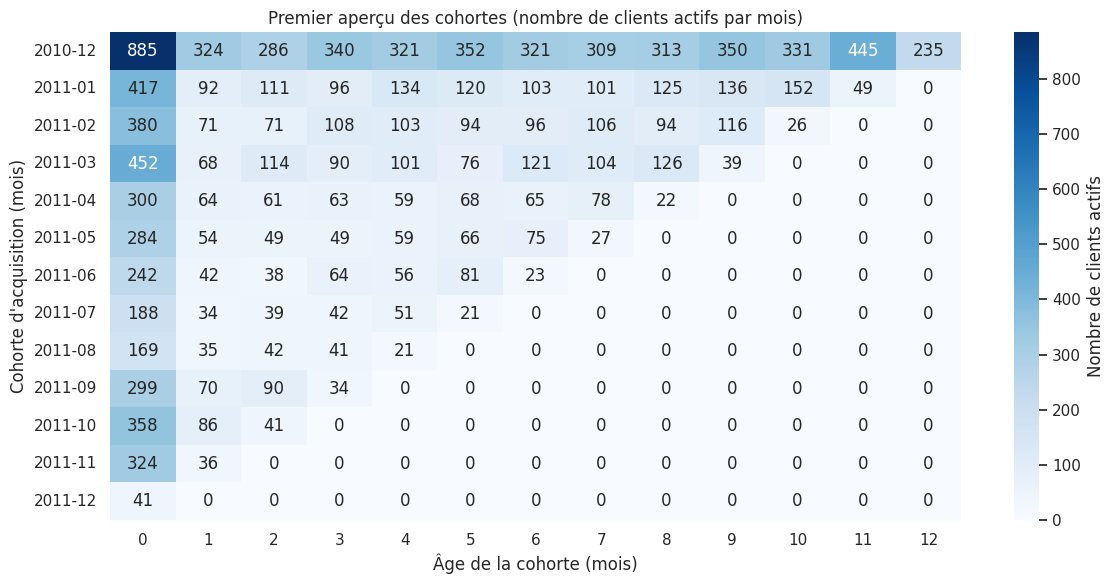

In [159]:
# Ventes réelles (positives)
df_sales = df[df["Quantity"] > 0].copy()

# Cohorte = mois de première commande par client
df_sales["CohortMonth"] = df_sales.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")

#  Mois de la transaction
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

#  Age de la cohorte (en mois)
df_sales["CohortAge"] = ((df_sales["InvoiceMonth"].dt.year - df_sales["CohortMonth"].dt.year)*12 + (df_sales["InvoiceMonth"].dt.month - df_sales["CohortMonth"].dt.month))

#  Tableau des clients actifs par cohorte et âge
cohort_counts = df_sales.groupby(["CohortMonth", "CohortAge"])["Customer ID"].nunique().unstack(fill_value=0)

#  Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cohort_counts, cmap="Blues", annot=True, fmt="d", cbar_kws={'label': 'Nombre de clients actifs'})
plt.title("Premier aperçu des cohortes (nombre de clients actifs par mois)")
plt.ylabel("Cohorte d'acquisition (mois)")
plt.xlabel("Âge de la cohorte (mois)")
plt.tight_layout()
plt.show()

Lignes(CohortMonth): le mois de la première commande
colonnes(CohortAge): l'âge des cohortes en mois
Exemple: (2011-06,3) indique le nombre de clients ayant effectué une commande 3 mois apès leur première commande

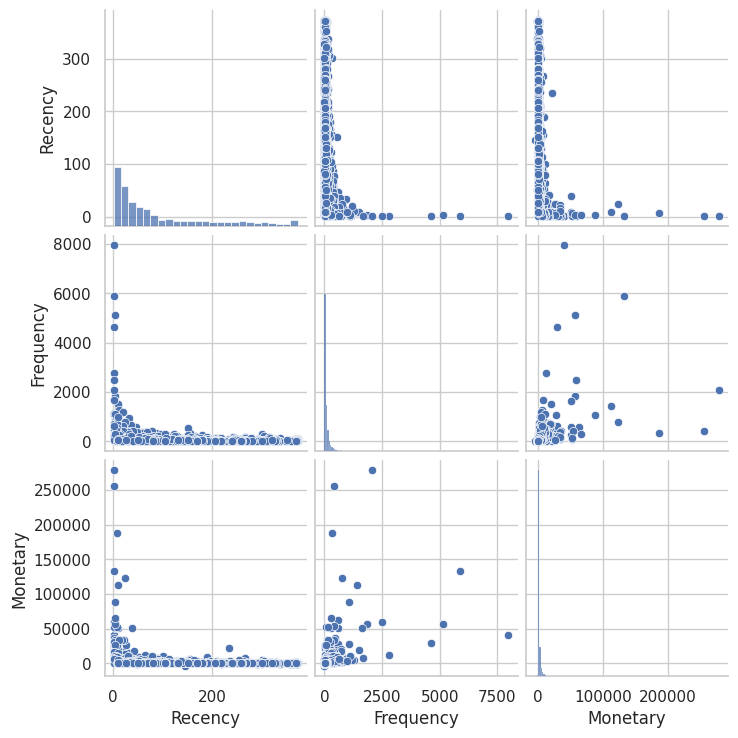

In [160]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)  # lendemain de la dernière transaction

# Calcul RFM
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice": "count",
    "Amount": "sum"
})
rfm.columns = ["Recency","Frequency","Monetary"]

# Pairplot sur un échantillon
n_clients = len(rfm)
sns.pairplot(rfm.sample(n=min(5000, n_clients), random_state=42))
plt.show()



### Heatmap du Chiffre d'affaires mensuel de chaque produit 

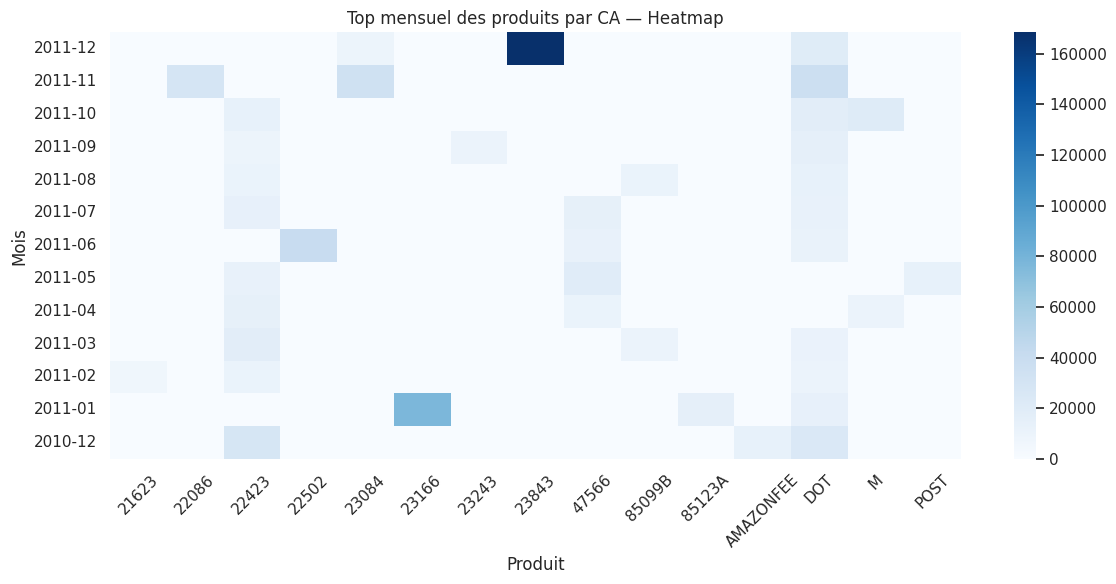

In [161]:
#Heatmap du Chiffre d'affaires mensuel de chaque produit 
df_sales = df[df["Quantity"] > 0].copy()
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

df_top = (
    df_sales.groupby(["InvoiceMonth","StockCode"])["Amount"]
      .sum()
      .reset_index()
)

df_top = (
    df_top.sort_values(["InvoiceMonth","Amount"], ascending=[True,False])
          .groupby("InvoiceMonth")
          .head(3)
)

pivot = df_top.pivot_table(
    index="InvoiceMonth",
    columns="StockCode",
    values="Amount",
    fill_value=0
).sort_index(ascending=False)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Top mensuel des produits par CA — Heatmap")
plt.xlabel("Produit")
plt.ylabel("Mois")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:
#df.to_csv("data/processed/retail_clean_full.csv", index=False)
#df_clients.to_csv("data/processed/retail_clean_clients.csv", index=False)
#print("\nFichiers exportés dans data/processed/")
